In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Data_Analyst_Assignment_Dataset.csv")

# Display the first few rows of the dataset
print(data.head())


   Amount Pending      State  Tenure  Interest Rate       City Bounce String  \
0             963  Karnataka      11           7.69  Bangalore           SSS   
1            1194  Karnataka      11           6.16  Bangalore           SSB   
2            1807  Karnataka      14           4.24     Hassan           BBS   
3            2451  Karnataka      10           4.70  Bangalore           SSS   
4            2611  Karnataka      10           4.41     Mysore           SSB   

   Disbursed Amount Loan Number  
0             10197       JZ6FS  
1             12738       RDIOY  
2             24640       WNW4L  
3             23990       6LBJS  
4             25590       ZFZUA  


In [ ]:
#Task 1: Calculate risk labels for borrowers

In [5]:
# Define a function to calculate risk labels
def calculate_risk_label(row):
    bounce_string = row['Bounce String']
    # New customers
    if 'F' in bounce_string:
        return 'Unknown Risk'
    # Customers who have not bounced in the last 6 months
    elif bounce_string[:6] == 'SSSSSS':
        return 'Low Risk'
    # Customers who have bounced less than twice in the last 6 months and not in the last month
    elif len(bounce_string) >= 6 and bounce_string[:6].count('B') + bounce_string[:6].count('L') < 2 and len(bounce_string) > 5 and bounce_string[5] != 'B' and bounce_string[5] != 'L':
        return 'Medium Risk'
    # Every other customer
    else:
        return 'High Risk'

# Apply the function to create a new column for risk labels
data['Risk Label'] = data.apply(calculate_risk_label, axis=1)



In [6]:
data

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,High Risk
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,High Risk
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk
...,...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C,Unknown Risk
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9,Unknown Risk
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q,Unknown Risk
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72,Unknown Risk


In [32]:
# Define a function to label borrowers based on tenure status
def label_tenure_status(row):
    try:
        tenure = int(row['Tenure'])
        loan_number = int(row['Loan Number'])
    except ValueError:
        # Return 'Unknown' for cases where Tenure or Loan Number is not a valid integer
        return 'Unknown'

    # Early tenure
    if tenure == 3:
        return 'Early Tenure'
    # Late tenure
    elif tenure > 3 and loan_number - tenure == 3:
        return 'Late Tenure'
    # Mid tenure
    else:
        return 'Mid Tenure'

# Convert 'Loan Number' column to integer type
data['Loan Number'] = pd.to_numeric(data['Loan Number'], errors='coerce')

# Apply the function to create a new column for tenure status
data['Tenure Status'] = data.apply(label_tenure_status, axis=1)




In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24582 entries, 0 to 24581
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amount Pending    24582 non-null  int64  
 1   State             24582 non-null  object 
 2   Tenure            24582 non-null  int64  
 3   Interest Rate     24582 non-null  float64
 4   City              24582 non-null  object 
 5   Bounce String     24582 non-null  object 
 6   Disbursed Amount  24582 non-null  int64  
 7   Loan Number       24582 non-null  object 
 8   Risk Label        24582 non-null  object 
 9   Tenure Status     24582 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.9+ MB


In [10]:
#Task 3: Distribute borrowers into cohorts based on ticket size

In [11]:
# Sort the data by amount pending
data_sorted = data.sort_values(by='Amount Pending')

# Calculate cumulative sum of amount pending
data_sorted['Cumulative Amount Pending'] = data_sorted['Amount Pending'].cumsum()

# Determine the approximate equal distribution points for ticket size cohorts
total_amount_pending = data_sorted['Cumulative Amount Pending'].max()
target_amount_per_cohort = total_amount_pending / 3

# Assign ticket size cohorts based on cumulative amount pending
data_sorted['Ticket Size Cohort'] = pd.cut(data_sorted['Cumulative Amount Pending'], bins=[0, target_amount_per_cohort, 2*target_amount_per_cohort, total_amount_pending], labels=['Low Ticket Size', 'Medium Ticket Size', 'High Ticket Size'])

# Reset index
data_sorted.reset_index(drop=True, inplace=True)


In [12]:
data

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Status
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,High Risk,Invalid Tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Invalid Tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Invalid Tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,High Risk,Invalid Tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,Invalid Tenure
...,...,...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C,Unknown Risk,Invalid Tenure
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9,Unknown Risk,Invalid Tenure
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q,Unknown Risk,Invalid Tenure
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72,Unknown Risk,Invalid Tenure


In [13]:
#Determine spend recommendations for each borrower segment

In [14]:
# Function to determine spend recommendation for each borrower
def determine_spend_recommendation(row):
    # Digital channel criteria
    if row['Risk Label'] == 'Low Risk' or 'F' in row['Bounce String'] or row['Amount Pending'] < 10000:
        return 'Digital'
    # Voice bot criteria
    elif row['City'] in ['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Chennai'] or row['Risk Label'] == 'Medium Risk' or row['Amount Pending'] < 50000:
        return 'Voice bot'
    # Telecalling for all other scenarios
    else:
        return 'Telecalling'

# Apply the function to create a new column for spend recommendation
data_sorted['Spend Recommendation'] = data_sorted.apply(determine_spend_recommendation, axis=1)


In [15]:
data

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Status
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,High Risk,Invalid Tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Invalid Tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Invalid Tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,High Risk,Invalid Tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,Invalid Tenure
...,...,...,...,...,...,...,...,...,...,...
24577,899,Andhra Pradesh,8,0.00,Chittoor,FEMI,7192,EAX5C,Unknown Risk,Invalid Tenure
24578,2699,Andhra Pradesh,8,0.00,Krishna,FEMI,21592,5MCE9,Unknown Risk,Invalid Tenure
24579,1540,Andhra Pradesh,8,0.00,Krishna,FEMI,12320,9HO4Q,Unknown Risk,Invalid Tenure
24580,824,Andhra Pradesh,8,0.00,Guntur,FEMI,6592,3VV72,Unknown Risk,Invalid Tenure


In [16]:
import matplotlib.pyplot as plt

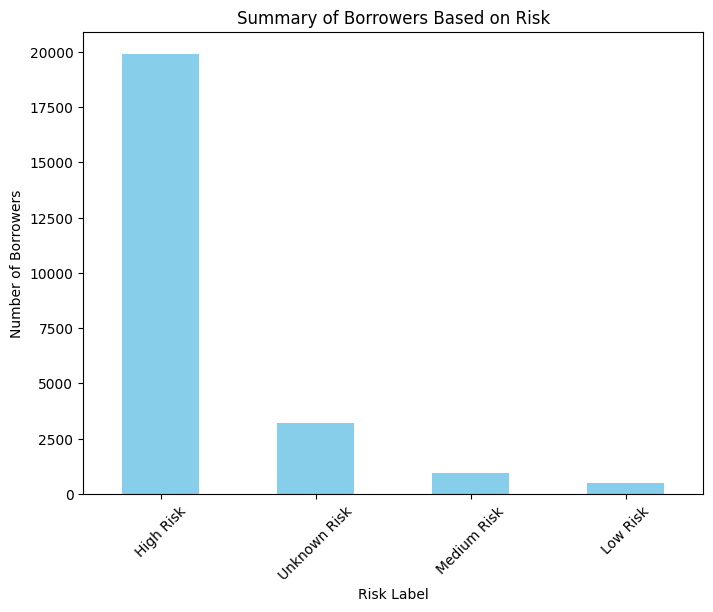

In [17]:
# Count of borrowers based on risk label
risk_counts = data['Risk Label'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
risk_counts.plot(kind='bar', color='skyblue')
plt.title('Summary of Borrowers Based on Risk')
plt.xlabel('Risk Label')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()


In [18]:
#Summary of Borrowers Based on Ticket Sizes

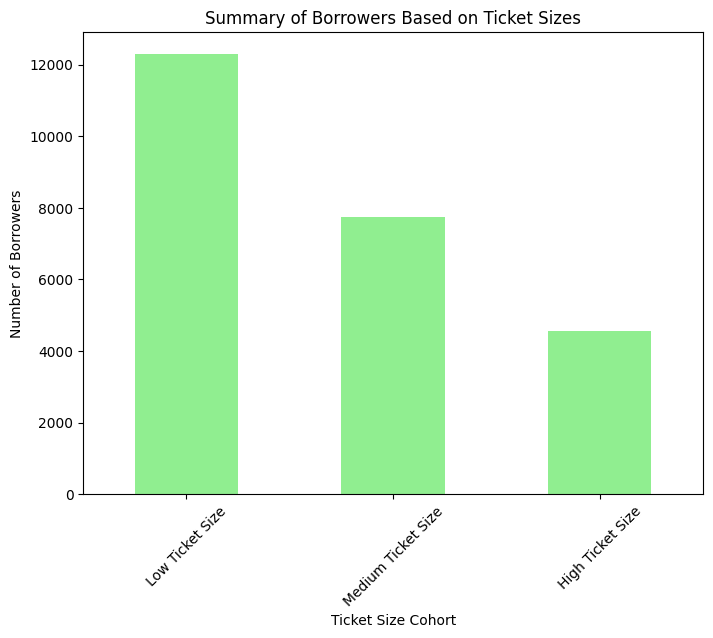

In [19]:
# Count of borrowers based on ticket size cohort
ticket_size_counts = data_sorted['Ticket Size Cohort'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
ticket_size_counts.plot(kind='bar', color='lightgreen')
plt.title('Summary of Borrowers Based on Ticket Sizes')
plt.xlabel('Ticket Size Cohort')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()


The graph of tenure completion will show unknown as loan number coloumn is non numreic and we cant convert non numeric column to integer

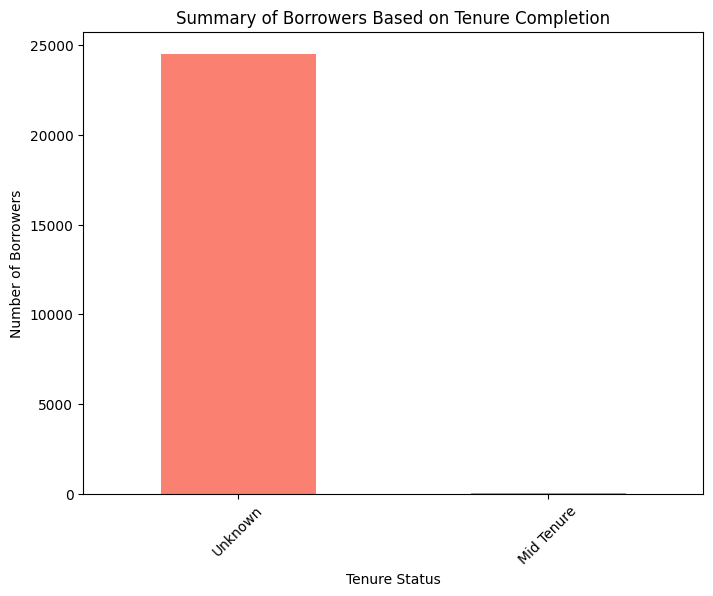

In [33]:
# Count of borrowers based on tenure status
tenure_counts = data['Tenure Status'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
tenure_counts.plot(kind='bar', color='salmon')
plt.title('Summary of Borrowers Based on Tenure Completion')
plt.xlabel('Tenure Status')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()


To minimize spend while maximizing repayment rate, we can follow these recommendations:

Digital Channel: Allocate resources to customers with excellent repayment behavior, first EMIs, or low EMIs. This helps minimize costs while targeting customers with a higher likelihood of timely repayment.

Voice Bot: Invest in customers who know Hindi or English, reside in metropolitan areas, have low bounce behavior, or have low to medium-sized EMIs. This strikes a balance between cost and effectiveness, targeting customers who are more likely to respond positively to automated voice communication.

Telecalling: Utilize telecalling for all other scenarios. While this is the costliest option, it ensures direct interaction with customers, which might be necessary for high-risk borrowers or those requiring personalized assistance.